<a href="https://colab.research.google.com/github/bikraamjitboshu/ML-projects/blob/main/Metro_Traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Metro Interstate Traffic Volume
Abstract: Hourly Minneapolis-St Paul, MN traffic volume for westbound I-94. Includes weather and holiday features from 2012-2018. https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume

1. holiday Categorical US National holidays plus regional holiday, Minnesota State Fair
2. temp Numeric Average temp in kelvin
3. rain_1h Numeric Amount in mm of rain that occurred in the hour
4. snow_1h Numeric Amount in mm of snow that occurred in the hour
5. clouds_all Numeric Percentage of cloud cover
6. weather_main Categorical Short textual description of the current weather
7. weather_description Categorical Longer textual description of the current weather
8. date_time DateTime Hour of the data collected in local CST time
9. traffic_volume Numeric Hourly I-94 ATR 301 reported westbound traffic volume

In [ ]:
from google.colab import files
files.upload()

Saving Metro_Interstate_Traffic_Volume.csv to Metro_Interstate_Traffic_Volume.csv


{'Metro_Interstate_Traffic_Volume.csv': b'holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume\r\nNone,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545\r\nNone,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516\r\nNone,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767\r\nNone,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026\r\nNone,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918\r\nNone,291.72,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,5181\r\nNone,293.17,0.0,0.0,1,Clear,sky is clear,2012-10-02 15:00:00,5584\r\nNone,293.86,0.0,0.0,1,Clear,sky is clear,2012-10-02 16:00:00,6015\r\nNone,294.14,0.0,0.0,20,Clouds,few clouds,2012-10-02 17:00:00,5791\r\nNone,293.1,0.0,0.0,20,Clouds,few clouds,2012-10-02 18:00:00,4770\r\nNone,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539\r\nNone,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784\r\nNone,288

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [ ]:
df=pd.read_csv("Metro_Interstate_Traffic_Volume.csv",parse_dates=['date_time'])

In [ ]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [ ]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [ ]:
df['holiday'].unique()

array(['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [ ]:
df['weather_main'].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

In [ ]:
df['weather_description'].unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'fog',
       'proximity shower rain', 'drizzle', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy snow', 'heavy intensity drizzle', 'snow',
       'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with rain', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'smoke', 'shower drizzle',
       'light shower snow', 'sleet'], dtype=object)

In [ ]:
df['date'] = df['date_time'].dt.date
df['time'] = df['date_time'].dt.time

In [ ]:
df['date'] = df['date'].apply(lambda x : pd.to_datetime(str(x)))
#df['time'] = df['time'].apply(lambda x : pd.to_datetime(str(x)))

In [ ]:
df['date'].dtype

dtype('<M8[ns]')

In [ ]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,date,time
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,2012-10-02,09:00:00
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,2012-10-02,10:00:00
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,2012-10-02,11:00:00
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,2012-10-02,12:00:00
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,2012-10-02,13:00:00


In [ ]:
df['day_of_week']=df['date'].dt.weekday

In [ ]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,date,time,day_of_week
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,2012-10-02,09:00:00,1
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,2012-10-02,10:00:00,1
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,2012-10-02,11:00:00,1
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,2012-10-02,12:00:00,1
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,2012-10-02,13:00:00,1


In [ ]:
df.drop(['date_time','date'],axis=1,inplace=True)

In [ ]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,time,day_of_week
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,09:00:00,1
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,10:00:00,1
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,11:00:00,1
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,12:00:00,1
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,13:00:00,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


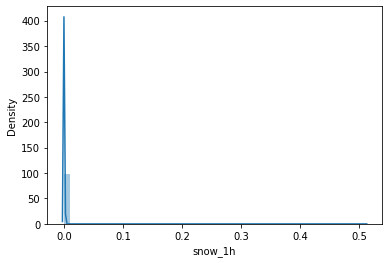

In [ ]:
sns.distplot(df['snow_1h'])

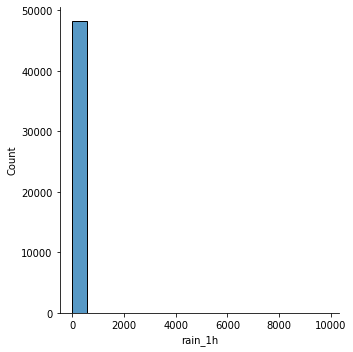

In [ ]:
sns.displot(df['rain_1h'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


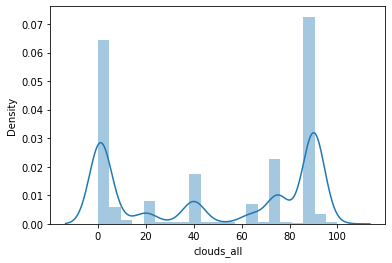

In [ ]:
sns.distplot(df['clouds_all'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


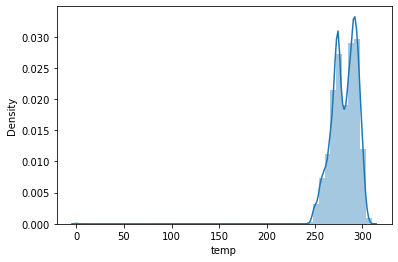

In [ ]:
sns.distplot(df['temp'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


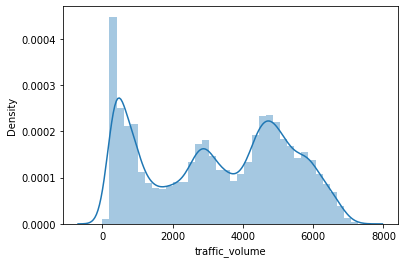

In [ ]:
sns.distplot(df['traffic_volume'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


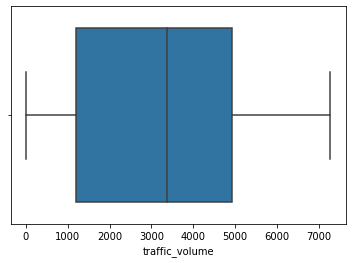

In [ ]:
sns.boxplot(df['traffic_volume'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   traffic_volume       48204 non-null  int64  
 8   time                 48204 non-null  object 
 9   day_of_week          48204 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 3.7+ MB


<Figure size 1440x1080 with 0 Axes>

<Figure size 3600x2160 with 0 Axes>

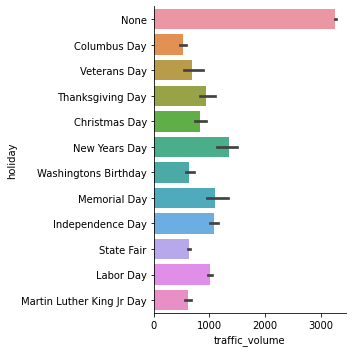

In [ ]:
fig = plt.gcf()
plt.figure(figsize=(50,30))
#fig.set_figwidth(500) 
#fig.set_figheight(50)
fig.set_size_inches(20,15)
sns.catplot(y='holiday',x='traffic_volume',kind='bar',orient='h',data=df)
plt.tight_layout()
plt.show()

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# plt.figure(figsize=(15,8))
# ax = sns.barplot(x="Word", y="Frequency", data=boxdata)

<Figure size 10800x10800 with 0 Axes>

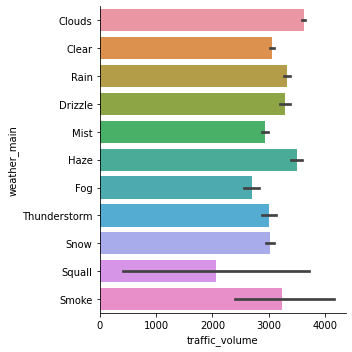

In [ ]:
plt.figure(figsize=(150,150))
fig.set_figwidth(50) 
fig.set_figheight(20)
sns.catplot(y='weather_main',x='traffic_volume',kind='bar',data=df )
plt.tight_layout()

<Figure size 3600x3600 with 0 Axes>

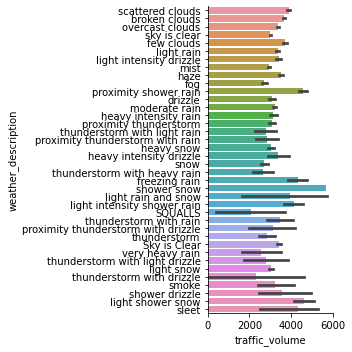

In [ ]:
plt.figure(figsize=(50,50))
fig.set_figwidth(500) 
fig.set_figheight(50)
sns.catplot(y='weather_description',x='traffic_volume',kind='bar',data=df)
plt.tight_layout()

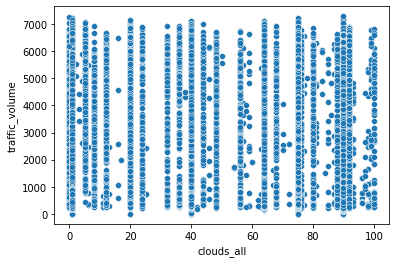

In [ ]:
sns.scatterplot(x='clouds_all',y='traffic_volume',data=df)

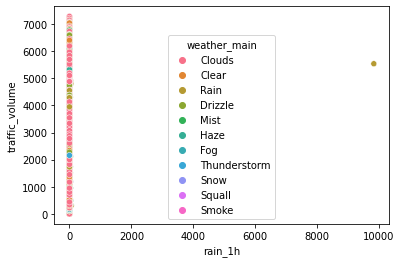

In [ ]:
sns.scatterplot(x='rain_1h',y='traffic_volume',hue='weather_main',data=df)

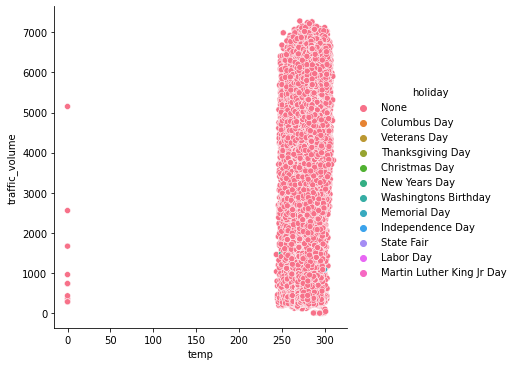

In [ ]:
sns.relplot(x='temp',y='traffic_volume',hue='holiday',data=df,kind='scatter')

In [ ]:
df['snow_1h'].nunique()

12

In [ ]:
df['rain_1h'].nunique()

372

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f68aa93a510>,
      dtype=object)

<Figure size 10800x10800 with 0 Axes>

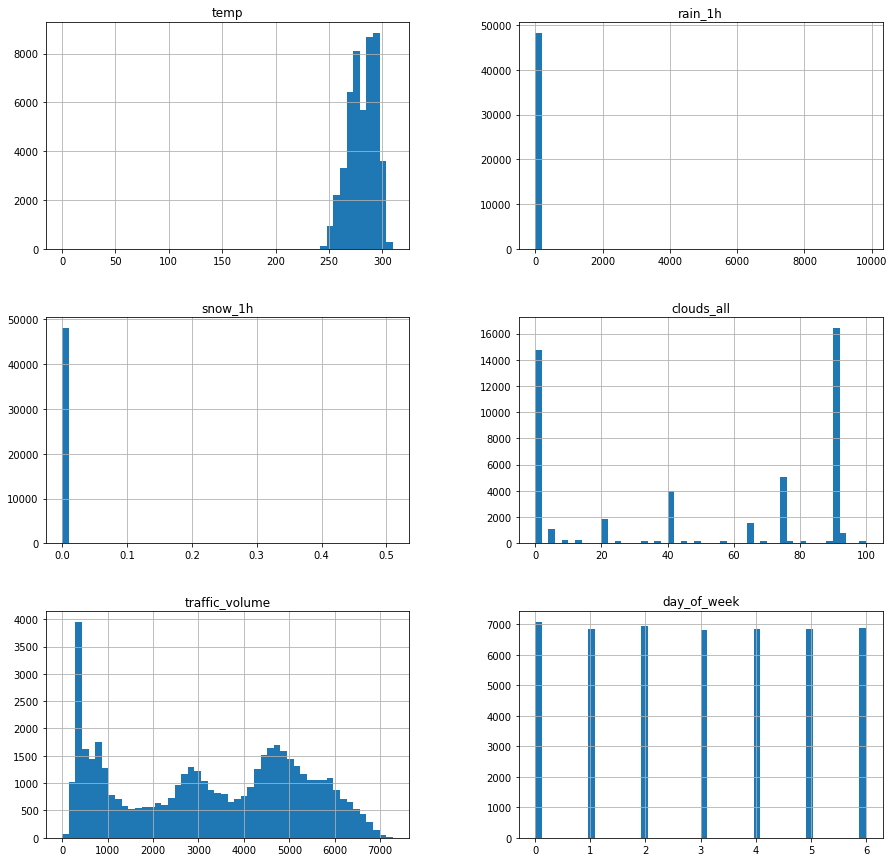

In [ ]:
plt.figure(figsize=(150,150))
df.hist(bins=50,figsize=(15,15))

In [ ]:
from sklearn.preprocessing import OneHotEncoder 
onehotencoder = OneHotEncoder() 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   traffic_volume       48204 non-null  int64  
 8   time                 48204 non-null  object 
 9   day_of_week          48204 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 3.7+ MB


In [ ]:
## passing a list of variables into the get_dummies function to create dummy variables 

data1= pd.get_dummies(df[['holiday','weather_main']],drop_first=True)     ## ??? 

In [ ]:
new_df=pd.concat([df,data1],axis=1)

In [ ]:
new_df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,time,day_of_week,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,holiday_None,holiday_State Fair,holiday_Thanksgiving Day,holiday_Veterans Day,holiday_Washingtons Birthday,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,09:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,10:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,11:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,12:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,13:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
## df['weather_description'].nunique()

In [ ]:
## new_df2=pd.get_dummies(new_df['weather_description'],drop_first=True)

In [ ]:
##df2= pd.concat([new_df,new_df2],axis=1)

In [ ]:
##df2.head()

In [ ]:
new_df.drop(['holiday','weather_main','weather_description'],axis=1,inplace=True)

In [ ]:
new_df.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,time,day_of_week,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,holiday_None,holiday_State Fair,holiday_Thanksgiving Day,holiday_Veterans Day,holiday_Washingtons Birthday,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm
0,288.28,0.0,0.0,40,5545,09:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,289.36,0.0,0.0,75,4516,10:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,289.58,0.0,0.0,90,4767,11:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,290.13,0.0,0.0,90,5026,12:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,291.14,0.0,0.0,75,4918,13:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
df_scaled=new_df.loc[:,['temp','clouds_all']]

In [ ]:
df_scaled.head()

,temp,clouds_all
0,288.28,40
1,289.36,75
2,289.58,90
3,290.13,90
4,291.14,75


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
scaled_values=sc.fit_transform(df_scaled)

In [ ]:
df_scaled=pd.DataFrame(scaled_values)

In [ ]:
df_scaled.head()

,0,1
0,0.530370,-0.239963
1,0.611341,0.657120
2,0.627836,1.041584
3,0.669071,1.041584
4,0.744794,0.657120


In [ ]:
df_scaled.columns=['temp','clouds_all']

In [ ]:
df_scaled.head()

,temp,clouds_all
0,0.530370,-0.239963
1,0.611341,0.657120
2,0.627836,1.041584
3,0.669071,1.041584
4,0.744794,0.657120


In [ ]:
df2=pd.concat([new_df,df_scaled],axis=1)

In [ ]:
df2.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,time,day_of_week,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,holiday_None,holiday_State Fair,holiday_Thanksgiving Day,holiday_Veterans Day,holiday_Washingtons Birthday,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,temp,clouds_all
0,288.28,0.0,0.0,40,5545,09:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.530370,-0.239963
1,289.36,0.0,0.0,75,4516,10:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.611341,0.657120
2,289.58,0.0,0.0,90,4767,11:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.627836,1.041584
3,290.13,0.0,0.0,90,5026,12:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.669071,1.041584
4,291.14,0.0,0.0,75,4918,13:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.744794,0.657120


In [ ]:
df2['clouds_all']= df_scaled['clouds_all']
df2['temp']= df_scaled['temp']

In [ ]:
df2.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,time,day_of_week,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,holiday_None,holiday_State Fair,holiday_Thanksgiving Day,holiday_Veterans Day,holiday_Washingtons Birthday,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,temp,clouds_all
0,0.530370,0.0,0.0,-0.239963,5545,09:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.530370,-0.239963
1,0.611341,0.0,0.0,0.657120,4516,10:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.611341,0.657120
2,0.627836,0.0,0.0,1.041584,4767,11:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.627836,1.041584
3,0.669071,0.0,0.0,1.041584,5026,12:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.669071,1.041584
4,0.744794,0.0,0.0,0.657120,4918,13:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.744794,0.657120


In [ ]:
df2.drop(['temp','clouds_all'],axis=1,inplace=True)

In [ ]:
df2.head()

,rain_1h,snow_1h,traffic_volume,time,day_of_week,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,holiday_None,holiday_State Fair,holiday_Thanksgiving Day,holiday_Veterans Day,holiday_Washingtons Birthday,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm
0,0.0,0.0,5545,09:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0.0,0.0,4516,10:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0.0,0.0,4767,11:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0.0,0.0,5026,12:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0.0,0.0,4918,13:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
df2['clouds_all']= df_scaled['clouds_all']
df2['temp']= df_scaled['temp']

In [ ]:
df2.head()

,rain_1h,snow_1h,traffic_volume,time,day_of_week,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,holiday_None,holiday_State Fair,holiday_Thanksgiving Day,holiday_Veterans Day,holiday_Washingtons Birthday,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,clouds_all,temp
0,0.0,0.0,5545,09:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-0.239963,0.530370
1,0.0,0.0,4516,10:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.657120,0.611341
2,0.0,0.0,4767,11:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.041584,0.627836
3,0.0,0.0,5026,12:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.041584,0.669071
4,0.0,0.0,4918,13:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.657120,0.744794


In [ ]:
df2['time'][1]


datetime.time(10, 0)

In [ ]:
# x = df2['time'][9]
# x= str(x)
# hour = x.split(':')[0]
# hour=int(hour)

# print(hour)

18


In [ ]:
def timeclub(x):
  x= str(x)
  hour = x.split(':')[0]
  hour=int(hour)
  if 9 <= hour < 12 :
    return 0
  elif 12 <= hour < 15:
    return 1
  elif 15 <= hour < 18:
    return 3
  elif 18 <= hour < 21:
    return 4
  elif 21 <= hour < 24:
    return 5
  elif 0 <= hour < 3:
    return 6
  elif 3 <= hour < 6:
    return 7
  else:
    return 8



In [ ]:
# timeclub(hour)

4

In [ ]:
df2['hour']=0
#len(df2['time'])
for i in range(0,len(df2['time'])):
  df2['hour'][i]=timeclub(df2['time'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df2.head(20)

,rain_1h,snow_1h,traffic_volume,time,day_of_week,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,holiday_None,holiday_State Fair,holiday_Thanksgiving Day,holiday_Veterans Day,holiday_Washingtons Birthday,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,clouds_all,temp,hour
0,0.0,0.0,5545,09:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-0.239963,0.530370,0
1,0.0,0.0,4516,10:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.657120,0.611341,0
2,0.0,0.0,4767,11:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.041584,0.627836,0
3,0.0,0.0,5026,12:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.041584,0.669071,1
4,0.0,0.0,4918,13:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.657120,0.744794,1
5,0.0,0.0,5181,14:00:00,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.239569,0.788278,1
6,0.0,0.0,5584,15:00:00,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.239569,0.896989,3
7,0.0,0.0,6015,16:00:00,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.239569,0.948721,3
8,0.0,0.0,5791,17:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-0.752582,0.969714,3
9,0.0,0.0,4770,18:00:00,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-0.752582,0.891741,4


In [ ]:
df2.drop(['time'],axis=1,inplace=True)

In [ ]:
X=df2.drop(['traffic_volume'], axis=1)
Y=df2['traffic_volume']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1234)

In [ ]:
x_train.head()

,rain_1h,snow_1h,day_of_week,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,holiday_None,holiday_State Fair,holiday_Thanksgiving Day,holiday_Veterans Day,holiday_Washingtons Birthday,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,clouds_all,temp,hour
23607,0.0,0.0,2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-0.239963,0.722302,6
7248,0.0,0.0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.990322,1.069428,8
44894,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-0.239963,0.885744,6
16004,0.0,0.0,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-0.239963,1.394062,3
20061,0.0,0.0,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.041584,-0.844639,7


In [ ]:
x_train.shape

(33742, 27)

In [ ]:
y_train.shape

(33742,)

In [ ]:
x_test.shape

(14462, 27)

In [ ]:
y_test.shape

(14462,)

In [ ]:
linear_reg=LinearRegression()

In [ ]:
linear_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Coefficients: ', linear_reg.coef_)

Coefficients:  [ 1.08555178e-01 -4.66541599e+02 -1.45394150e+02 -5.23294286e+02
  1.43109429e+02 -1.34235031e+02 -2.31887476e+02 -1.11736019e+02
  2.28398190e+02  2.03984661e+03 -9.38231037e+01  2.24852310e+02
 -1.70146926e+02 -4.45117140e+02  3.05292582e+02  1.08932007e+02
 -1.64051902e+00  1.41146993e+02  3.68074448e+00  4.90764705e+00
 -3.20711894e+02 -6.79462832e+01 -1.31591156e+03 -2.51773550e+02
  2.77494221e+01  1.65178369e+02 -3.28189037e+02]


In [ ]:
y_pred=linear_reg.predict(x_test)

In [ ]:
print(y_pred)

[4551.69489052 3249.69021498 4386.19102215 ... 3904.958299   2503.03116476
 2571.92053701]


In [ ]:
y_resid=y_pred-y_test

In [ ]:
print(y_resid)

18463   -1505.305109
25640    1458.690215
46807     464.191022
43328     994.834186
38022   -1815.235598
            ...     
44981   -1502.586601
22622     365.556004
29423     537.958299
28560    1127.031165
38006    1749.920537
Name: traffic_volume, Length: 14462, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


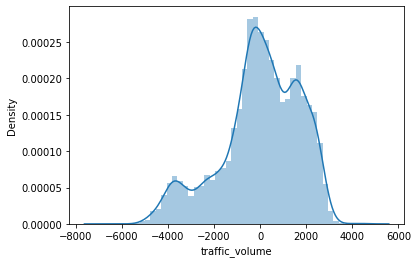

In [ ]:
sns.distplot(y_resid)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.23687450832606172
3007871.5880123735
1360.3069860362343


In [ ]:
final_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
final_data.head()


,Actual,Predicted
18463,6057,4551.694891
25640,1791,3249.690215
46807,3922,4386.191022
43328,1659,2653.834186
38022,5203,3387.764402


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(linear_reg, x_train, y_train, cv=5)
scores

array([ 0.25342858,  0.23558509,  0.24474997, -6.01573123,  0.24221227])

In [ ]:
scores.mean()

-1.0079510633156818

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=1234,max_depth=3) 

In [ ]:
dt_regressor.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

In [ ]:
y_pred1= dt_regressor.predict(x_test)
y_pred1

array([5142.33745504, 2107.95320255, 4083.03818752, ..., 4083.03818752,
       2107.95320255,  816.03338002])

In [ ]:
print(r2_score(y_test,y_pred1))
print(mean_squared_error(y_test,y_pred1))
print(mean_absolute_error(y_test,y_pred1))

0.8400713749292865
630361.2875058028
590.9144333032642


In [ ]:
feature_importance_1= pd.Series(dt_regressor.feature_importances_,index=x_train.columns)
feature_importance_1.head()

rain_1h                     0.000000
snow_1h                     0.000000
day_of_week                 0.153313
holiday_Columbus Day        0.000000
holiday_Independence Day    0.000000
dtype: float64

In [ ]:
# sns.barplot(x=feature_importance_1,y=feature_importance_1.index)     ## how can show a certain set of features and not the whole feature set 
# plt.xlabel('feature_importance')
# plt.ylabel('features')
# plt.show()

In [ ]:
final_data2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
final_data2.head()

,Actual,Predicted
18463,6057,5142.337455
25640,1791,2107.953203
46807,3922,4083.038188
43328,1659,3209.954163
38022,5203,4083.038188
